In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json,requests
from getpass import getpass

In [3]:
df1 = pd.read_json('StreamingHistory0.json')
df2 = pd.read_json('StreamingHistory1.json')

In [4]:
df_stream = pd.concat([df1,df2])
df_stream['UniqueID'] = df_stream['artistName'] + ":" + df_stream['trackName']

df_stream.head()
df_stream

,endTime,artistName,trackName,msPlayed,UniqueID
0,2022-05-18 16:39,Indila,Love Story,180104,Indila:Love Story
1,2022-05-19 04:55,Indila,Love Story,316280,Indila:Love Story
2,2022-05-19 05:01,Taylor Swift,my tears ricochet,6225,Taylor Swift:my tears ricochet
3,2022-05-19 05:01,Paloma Faith,Only Love Can Hurt Like This,232893,Paloma Faith:Only Love Can Hurt Like This
4,2022-05-19 05:06,Conan Gray,Memories,248818,Conan Gray:Memories
...,...,...,...,...,...
1217,2023-05-18 17:12,SEVENTEEN,PANG!,178640,SEVENTEEN:PANG!
1218,2023-05-18 17:16,SEVENTEEN,HEY BUDDY,198240,SEVENTEEN:HEY BUDDY
1219,2023-05-18 17:55,SEVENTEEN,Pinwheel,219029,SEVENTEEN:Pinwheel
1220,2023-05-18 17:58,SEVENTEEN,MY I,184136,SEVENTEEN:MY I


In [5]:
with open('C:\\Users\\pallu\\OneDrive\\Desktop\\Resume Projects\\my_spotify_data\\MyData\\YourLibrary.json', encoding='utf8') as f:
    library=json.load(f)

In [6]:
df_library = pd.DataFrame()

def extract_json_value_library(column_name, data_source=library):
    
    return [i[column_name] for i in data_source['tracks']]

df_library['artist_name'] = extract_json_value_library('artist')
df_library['album'] = extract_json_value_library('album')
df_library['track_name'] = extract_json_value_library('track')
df_library['uri'] = extract_json_value_library('uri')
new = df_library["uri"].str.split(":", expand = True)
df_library['track_uri'] = new[2]
df_library['UniqueID'] = df_library['artist_name'] + ":" + df_library['track_name']
df_library=df_library.drop(['uri'],axis=1)
df_library

,artist_name,album,track_name,track_uri,UniqueID
0,Pink Sweat$,17 (feat. Joshua and DK of SEVENTEEN),17 (feat. Joshua and DK of SEVENTEEN),5SifNhmUO8iSEoWFQU8kxH,Pink Sweat$:17 (feat. Joshua and DK of SEVENTEEN)
1,I.O.I,DOWNPOUR,DOWNPOUR,51CWs8Gipl0UqDGNA5xekm,I.O.I:DOWNPOUR
2,Red Velvet,The 1st Mini Album ‘Ice Cream Cake’,Ice Cream Cake,2oLLOxkJWJj9BbrsTc4Xql,Red Velvet:Ice Cream Cake
3,Kim Woo Sung,JTBC SuperBand Episode 7,ILYSB,2k5PT7lJxuJ1prVA5R3C5x,Kim Woo Sung:ILYSB
4,RYEOWOOK,Drunk on love - The 2nd Mini Album,I'm not over you,0tdMBJmUaobBXpttiycchZ,RYEOWOOK:I'm not over you
...,...,...,...,...,...
701,The 1975,A Brief Inquiry Into Online Relationships,I Always Wanna Die (Sometimes),7iPlcFvOMOzt6v0QvcAueZ,The 1975:I Always Wanna Die (Sometimes)
702,BTOB,Remember that,Remember That,0Ebot4LzRKFpNmlW0gkqe6,BTOB:Remember That
703,BSS,BSS Digital Single 'Just do it',Just do it,57ITlzpnOMkSE6oHGbvTqi,BSS:Just do it
704,Xobdo,Jonaki,Jonaki,0LRTAhiw2wXDjrqhbwM277,Xobdo:Jonaki


In [7]:
df_tableau=df_stream.copy()
df_tableau['InLibrary']=np.where(df_tableau['trackName'].isin(df_library['track_name'].tolist()),1,0)
df_tableau = pd.merge(df_tableau, df_library[['album','UniqueID','track_uri']],how='left',on=['UniqueID'])

df_tableau

,endTime,artistName,trackName,msPlayed,UniqueID,InLibrary,album,track_uri
0,2022-05-18 16:39,Indila,Love Story,180104,Indila:Love Story,1,Mini World,6nGeLlakfzlBcFdZXteDq7
1,2022-05-19 04:55,Indila,Love Story,316280,Indila:Love Story,1,Mini World,6nGeLlakfzlBcFdZXteDq7
2,2022-05-19 05:01,Taylor Swift,my tears ricochet,6225,Taylor Swift:my tears ricochet,1,folklore,1DnpjwTbSwV2V6O4PABMjW
3,2022-05-19 05:01,Paloma Faith,Only Love Can Hurt Like This,232893,Paloma Faith:Only Love Can Hurt Like This,1,A Perfect Contradiction,62ke5zFUJN6RvtXZgVH0F8
4,2022-05-19 05:06,Conan Gray,Memories,248818,Conan Gray:Memories,1,Memories,7AYP21Q4qnxw2WxETEvSRb
...,...,...,...,...,...,...,...,...
11263,2023-05-18 17:12,SEVENTEEN,PANG!,178640,SEVENTEEN:PANG!,1,SEVENTEEN 9th Mini Album 'Attacca',1ZpiUfzl9P0pMkA03xqmUy
11264,2023-05-18 17:16,SEVENTEEN,HEY BUDDY,198240,SEVENTEEN:HEY BUDDY,1,; [Semicolon],1hd8IgMElWy3OqcFVjZMUx
11265,2023-05-18 17:55,SEVENTEEN,Pinwheel,219029,SEVENTEEN:Pinwheel,1,"SEVENTEEN 2ND ALBUM 'TEEN, AGE' (2)",2NvrIHgujKttUQyx2uUMY9
11266,2023-05-18 17:58,SEVENTEEN,MY I,184136,SEVENTEEN:MY I,0,NaN,NaN


In [8]:
df_tableau.to_csv('df_tableau.csv')

In [9]:
cid, secret = input("Client_id:"),getpass("Secret:")

In [10]:
AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': cid,
    'client_secret': secret,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [11]:
headers = {'Authorization': 'Bearer {token}'.format(token=access_token)}

In [12]:
BASE_URL = 'https://api.spotify.com/v1/'

In [13]:
# create blank dictionary to store track URI, artist URI, and genres
dict_genre = {}

# convert track_uri column to an iterable list
track_uris = df_library['track_uri'].to_list()

# loop through track URIs and pull artist URI using the API,
# then use artist URI to pull genres associated with that artist
# store all these in a dictionary
for t_uri in track_uris:
    
    dict_genre[t_uri] = {'artist_uri': "", "genres":[]}
    
    r = requests.get(BASE_URL + 'tracks/' + t_uri, headers=headers)
    r = r.json()
    a_uri = r['artists'][0]['uri'].split(':')[2]
    dict_genre[t_uri]['artist_uri'] = a_uri
    
    s = requests.get(BASE_URL + 'artists/' + a_uri, headers=headers)
    s = s.json()
    dict_genre[t_uri]['genres'] = s['genres']

In [14]:
# convert dictionary into dataframe with track_uri as the first column
df_genre = pd.DataFrame.from_dict(dict_genre, orient='index')
df_genre.insert(0, 'track_uri', df_genre.index)
df_genre.reset_index(inplace=True, drop=True)
df_genre
df_genre.to_csv('genre.csv')

In [15]:
df_final = pd.merge(df_tableau, df_genre,how='left',on=['track_uri'])
df_final

,endTime,artistName,trackName,msPlayed,UniqueID,InLibrary,album,track_uri,artist_uri,genres
0,2022-05-18 16:39,Indila,Love Story,180104,Indila:Love Story,1,Mini World,6nGeLlakfzlBcFdZXteDq7,0FEJqmeLRzsXj8hgcZaAyB,[french pop]
1,2022-05-19 04:55,Indila,Love Story,316280,Indila:Love Story,1,Mini World,6nGeLlakfzlBcFdZXteDq7,0FEJqmeLRzsXj8hgcZaAyB,[french pop]
2,2022-05-19 05:01,Taylor Swift,my tears ricochet,6225,Taylor Swift:my tears ricochet,1,folklore,1DnpjwTbSwV2V6O4PABMjW,06HL4z0CvFAxyc27GXpf02,[pop]
3,2022-05-19 05:01,Paloma Faith,Only Love Can Hurt Like This,232893,Paloma Faith:Only Love Can Hurt Like This,1,A Perfect Contradiction,62ke5zFUJN6RvtXZgVH0F8,4fwuXg6XQHfdlOdmw36OHa,"[british soul, talent show]"
4,2022-05-19 05:06,Conan Gray,Memories,248818,Conan Gray:Memories,1,Memories,7AYP21Q4qnxw2WxETEvSRb,4Uc8Dsxct0oMqx0P6i60ea,"[bedroom pop, pop, pov: indie]"
...,...,...,...,...,...,...,...,...,...,...
11263,2023-05-18 17:12,SEVENTEEN,PANG!,178640,SEVENTEEN:PANG!,1,SEVENTEEN 9th Mini Album 'Attacca',1ZpiUfzl9P0pMkA03xqmUy,7nqOGRxlXj7N2JYbgNEjYH,"[k-pop, k-pop boy group]"
11264,2023-05-18 17:16,SEVENTEEN,HEY BUDDY,198240,SEVENTEEN:HEY BUDDY,1,; [Semicolon],1hd8IgMElWy3OqcFVjZMUx,7nqOGRxlXj7N2JYbgNEjYH,"[k-pop, k-pop boy group]"
11265,2023-05-18 17:55,SEVENTEEN,Pinwheel,219029,SEVENTEEN:Pinwheel,1,"SEVENTEEN 2ND ALBUM 'TEEN, AGE' (2)",2NvrIHgujKttUQyx2uUMY9,7nqOGRxlXj7N2JYbgNEjYH,"[k-pop, k-pop boy group]"
11266,2023-05-18 17:58,SEVENTEEN,MY I,184136,SEVENTEEN:MY I,0,NaN,NaN,NaN,NaN


In [16]:
df_final['endTime'] = pd.to_datetime(df_final['endTime'])

In [17]:
df_final['endTime'] = df_final['endTime']+pd.DateOffset(hours=5, minutes=30)
df_final 

,endTime,artistName,trackName,msPlayed,UniqueID,InLibrary,album,track_uri,artist_uri,genres
0,2022-05-18 22:09:00,Indila,Love Story,180104,Indila:Love Story,1,Mini World,6nGeLlakfzlBcFdZXteDq7,0FEJqmeLRzsXj8hgcZaAyB,[french pop]
1,2022-05-19 10:25:00,Indila,Love Story,316280,Indila:Love Story,1,Mini World,6nGeLlakfzlBcFdZXteDq7,0FEJqmeLRzsXj8hgcZaAyB,[french pop]
2,2022-05-19 10:31:00,Taylor Swift,my tears ricochet,6225,Taylor Swift:my tears ricochet,1,folklore,1DnpjwTbSwV2V6O4PABMjW,06HL4z0CvFAxyc27GXpf02,[pop]
3,2022-05-19 10:31:00,Paloma Faith,Only Love Can Hurt Like This,232893,Paloma Faith:Only Love Can Hurt Like This,1,A Perfect Contradiction,62ke5zFUJN6RvtXZgVH0F8,4fwuXg6XQHfdlOdmw36OHa,"[british soul, talent show]"
4,2022-05-19 10:36:00,Conan Gray,Memories,248818,Conan Gray:Memories,1,Memories,7AYP21Q4qnxw2WxETEvSRb,4Uc8Dsxct0oMqx0P6i60ea,"[bedroom pop, pop, pov: indie]"
...,...,...,...,...,...,...,...,...,...,...
11263,2023-05-18 22:42:00,SEVENTEEN,PANG!,178640,SEVENTEEN:PANG!,1,SEVENTEEN 9th Mini Album 'Attacca',1ZpiUfzl9P0pMkA03xqmUy,7nqOGRxlXj7N2JYbgNEjYH,"[k-pop, k-pop boy group]"
11264,2023-05-18 22:46:00,SEVENTEEN,HEY BUDDY,198240,SEVENTEEN:HEY BUDDY,1,; [Semicolon],1hd8IgMElWy3OqcFVjZMUx,7nqOGRxlXj7N2JYbgNEjYH,"[k-pop, k-pop boy group]"
11265,2023-05-18 23:25:00,SEVENTEEN,Pinwheel,219029,SEVENTEEN:Pinwheel,1,"SEVENTEEN 2ND ALBUM 'TEEN, AGE' (2)",2NvrIHgujKttUQyx2uUMY9,7nqOGRxlXj7N2JYbgNEjYH,"[k-pop, k-pop boy group]"
11266,2023-05-18 23:28:00,SEVENTEEN,MY I,184136,SEVENTEEN:MY I,0,NaN,NaN,NaN,NaN


In [18]:
df_final[df_final['InLibrary']==0]

,endTime,artistName,trackName,msPlayed,UniqueID,InLibrary,album,track_uri,artist_uri,genres
7,2022-05-19 10:44:00,Tove Lo,Cool Girl,199179,Tove Lo:Cool Girl,0,NaN,NaN,NaN,NaN
8,2022-05-19 10:48:00,Daya,New,230879,Daya:New,0,NaN,NaN,NaN,NaN
9,2022-05-19 10:52:00,The Weeknd,Die For You,166140,The Weeknd:Die For You,0,NaN,NaN,NaN,NaN
10,2022-05-19 10:55:00,Chase Atlantic,Swim,148021,Chase Atlantic:Swim,0,NaN,NaN,NaN,NaN
11,2022-05-19 10:57:00,Conan Gray,People Watching,158536,Conan Gray:People Watching,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
11260,2023-05-18 22:36:00,SEVENTEEN,Fronting,2996,SEVENTEEN:Fronting,0,NaN,NaN,NaN,NaN
11261,2023-05-18 22:36:00,SEVENTEEN,_WORLD,178453,SEVENTEEN:_WORLD,0,NaN,NaN,NaN,NaN
11262,2023-05-18 22:39:00,SEVENTEEN,DON QUIXOTE,172360,SEVENTEEN:DON QUIXOTE,0,NaN,NaN,NaN,NaN
11266,2023-05-18 23:28:00,SEVENTEEN,MY I,184136,SEVENTEEN:MY I,0,NaN,NaN,NaN,NaN


Data Prep

In [19]:
df_final.info()
df_final

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11268 entries, 0 to 11267
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   endTime     11268 non-null  datetime64[ns]
 1   artistName  11268 non-null  object        
 2   trackName   11268 non-null  object        
 3   msPlayed    11268 non-null  int64         
 4   UniqueID    11268 non-null  object        
 5   InLibrary   11268 non-null  int32         
 6   album       4677 non-null   object        
 7   track_uri   4677 non-null   object        
 8   artist_uri  4677 non-null   object        
 9   genres      4677 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 836.4+ KB


,endTime,artistName,trackName,msPlayed,UniqueID,InLibrary,album,track_uri,artist_uri,genres
0,2022-05-18 22:09:00,Indila,Love Story,180104,Indila:Love Story,1,Mini World,6nGeLlakfzlBcFdZXteDq7,0FEJqmeLRzsXj8hgcZaAyB,[french pop]
1,2022-05-19 10:25:00,Indila,Love Story,316280,Indila:Love Story,1,Mini World,6nGeLlakfzlBcFdZXteDq7,0FEJqmeLRzsXj8hgcZaAyB,[french pop]
2,2022-05-19 10:31:00,Taylor Swift,my tears ricochet,6225,Taylor Swift:my tears ricochet,1,folklore,1DnpjwTbSwV2V6O4PABMjW,06HL4z0CvFAxyc27GXpf02,[pop]
3,2022-05-19 10:31:00,Paloma Faith,Only Love Can Hurt Like This,232893,Paloma Faith:Only Love Can Hurt Like This,1,A Perfect Contradiction,62ke5zFUJN6RvtXZgVH0F8,4fwuXg6XQHfdlOdmw36OHa,"[british soul, talent show]"
4,2022-05-19 10:36:00,Conan Gray,Memories,248818,Conan Gray:Memories,1,Memories,7AYP21Q4qnxw2WxETEvSRb,4Uc8Dsxct0oMqx0P6i60ea,"[bedroom pop, pop, pov: indie]"
...,...,...,...,...,...,...,...,...,...,...
11263,2023-05-18 22:42:00,SEVENTEEN,PANG!,178640,SEVENTEEN:PANG!,1,SEVENTEEN 9th Mini Album 'Attacca',1ZpiUfzl9P0pMkA03xqmUy,7nqOGRxlXj7N2JYbgNEjYH,"[k-pop, k-pop boy group]"
11264,2023-05-18 22:46:00,SEVENTEEN,HEY BUDDY,198240,SEVENTEEN:HEY BUDDY,1,; [Semicolon],1hd8IgMElWy3OqcFVjZMUx,7nqOGRxlXj7N2JYbgNEjYH,"[k-pop, k-pop boy group]"
11265,2023-05-18 23:25:00,SEVENTEEN,Pinwheel,219029,SEVENTEEN:Pinwheel,1,"SEVENTEEN 2ND ALBUM 'TEEN, AGE' (2)",2NvrIHgujKttUQyx2uUMY9,7nqOGRxlXj7N2JYbgNEjYH,"[k-pop, k-pop boy group]"
11266,2023-05-18 23:28:00,SEVENTEEN,MY I,184136,SEVENTEEN:MY I,0,NaN,NaN,NaN,NaN


In [20]:
df_final['date'] = df_final['endTime'].dt.floor('d')
df_final

,endTime,artistName,trackName,msPlayed,UniqueID,InLibrary,album,track_uri,artist_uri,genres,date
0,2022-05-18 22:09:00,Indila,Love Story,180104,Indila:Love Story,1,Mini World,6nGeLlakfzlBcFdZXteDq7,0FEJqmeLRzsXj8hgcZaAyB,[french pop],2022-05-18
1,2022-05-19 10:25:00,Indila,Love Story,316280,Indila:Love Story,1,Mini World,6nGeLlakfzlBcFdZXteDq7,0FEJqmeLRzsXj8hgcZaAyB,[french pop],2022-05-19
2,2022-05-19 10:31:00,Taylor Swift,my tears ricochet,6225,Taylor Swift:my tears ricochet,1,folklore,1DnpjwTbSwV2V6O4PABMjW,06HL4z0CvFAxyc27GXpf02,[pop],2022-05-19
3,2022-05-19 10:31:00,Paloma Faith,Only Love Can Hurt Like This,232893,Paloma Faith:Only Love Can Hurt Like This,1,A Perfect Contradiction,62ke5zFUJN6RvtXZgVH0F8,4fwuXg6XQHfdlOdmw36OHa,"[british soul, talent show]",2022-05-19
4,2022-05-19 10:36:00,Conan Gray,Memories,248818,Conan Gray:Memories,1,Memories,7AYP21Q4qnxw2WxETEvSRb,4Uc8Dsxct0oMqx0P6i60ea,"[bedroom pop, pop, pov: indie]",2022-05-19
...,...,...,...,...,...,...,...,...,...,...,...
11263,2023-05-18 22:42:00,SEVENTEEN,PANG!,178640,SEVENTEEN:PANG!,1,SEVENTEEN 9th Mini Album 'Attacca',1ZpiUfzl9P0pMkA03xqmUy,7nqOGRxlXj7N2JYbgNEjYH,"[k-pop, k-pop boy group]",2023-05-18
11264,2023-05-18 22:46:00,SEVENTEEN,HEY BUDDY,198240,SEVENTEEN:HEY BUDDY,1,; [Semicolon],1hd8IgMElWy3OqcFVjZMUx,7nqOGRxlXj7N2JYbgNEjYH,"[k-pop, k-pop boy group]",2023-05-18
11265,2023-05-18 23:25:00,SEVENTEEN,Pinwheel,219029,SEVENTEEN:Pinwheel,1,"SEVENTEEN 2ND ALBUM 'TEEN, AGE' (2)",2NvrIHgujKttUQyx2uUMY9,7nqOGRxlXj7N2JYbgNEjYH,"[k-pop, k-pop boy group]",2023-05-18
11266,2023-05-18 23:28:00,SEVENTEEN,MY I,184136,SEVENTEEN:MY I,0,NaN,NaN,NaN,NaN,2023-05-18


In [21]:
df_final['minPlayed']=df_final['msPlayed']/60000
df_final

,endTime,artistName,trackName,msPlayed,UniqueID,InLibrary,album,track_uri,artist_uri,genres,date,minPlayed
0,2022-05-18 22:09:00,Indila,Love Story,180104,Indila:Love Story,1,Mini World,6nGeLlakfzlBcFdZXteDq7,0FEJqmeLRzsXj8hgcZaAyB,[french pop],2022-05-18,3.001733
1,2022-05-19 10:25:00,Indila,Love Story,316280,Indila:Love Story,1,Mini World,6nGeLlakfzlBcFdZXteDq7,0FEJqmeLRzsXj8hgcZaAyB,[french pop],2022-05-19,5.271333
2,2022-05-19 10:31:00,Taylor Swift,my tears ricochet,6225,Taylor Swift:my tears ricochet,1,folklore,1DnpjwTbSwV2V6O4PABMjW,06HL4z0CvFAxyc27GXpf02,[pop],2022-05-19,0.103750
3,2022-05-19 10:31:00,Paloma Faith,Only Love Can Hurt Like This,232893,Paloma Faith:Only Love Can Hurt Like This,1,A Perfect Contradiction,62ke5zFUJN6RvtXZgVH0F8,4fwuXg6XQHfdlOdmw36OHa,"[british soul, talent show]",2022-05-19,3.881550
4,2022-05-19 10:36:00,Conan Gray,Memories,248818,Conan Gray:Memories,1,Memories,7AYP21Q4qnxw2WxETEvSRb,4Uc8Dsxct0oMqx0P6i60ea,"[bedroom pop, pop, pov: indie]",2022-05-19,4.146967
...,...,...,...,...,...,...,...,...,...,...,...,...
11263,2023-05-18 22:42:00,SEVENTEEN,PANG!,178640,SEVENTEEN:PANG!,1,SEVENTEEN 9th Mini Album 'Attacca',1ZpiUfzl9P0pMkA03xqmUy,7nqOGRxlXj7N2JYbgNEjYH,"[k-pop, k-pop boy group]",2023-05-18,2.977333
11264,2023-05-18 22:46:00,SEVENTEEN,HEY BUDDY,198240,SEVENTEEN:HEY BUDDY,1,; [Semicolon],1hd8IgMElWy3OqcFVjZMUx,7nqOGRxlXj7N2JYbgNEjYH,"[k-pop, k-pop boy group]",2023-05-18,3.304000
11265,2023-05-18 23:25:00,SEVENTEEN,Pinwheel,219029,SEVENTEEN:Pinwheel,1,"SEVENTEEN 2ND ALBUM 'TEEN, AGE' (2)",2NvrIHgujKttUQyx2uUMY9,7nqOGRxlXj7N2JYbgNEjYH,"[k-pop, k-pop boy group]",2023-05-18,3.650483
11266,2023-05-18 23:28:00,SEVENTEEN,MY I,184136,SEVENTEEN:MY I,0,NaN,NaN,NaN,NaN,2023-05-18,3.068933


On what dates did you listen to more or less music on Spotify

In [22]:
sort_by_date = df_final.groupby("date")[["trackName"]].count()
sort_by_date["month"] = sort_by_date.index.strftime("%B")
sort_by_date["weekday"]=sort_by_date.index.strftime('%A')
sort_by_date["week"]=sort_by_date.index.strftime("%W")
most_least=sort_by_date.sort_values(by=['trackName'],ascending=False)
most_least

,trackName,month,weekday,week
date,,,,
2022-05-22,132,May,Sunday,20
2023-04-02,130,April,Sunday,13
2022-10-09,124,October,Sunday,40
2022-11-25,119,November,Friday,47
2022-09-08,116,September,Thursday,36
...,...,...,...,...
2022-12-29,1,December,Thursday,52
2023-03-04,1,March,Saturday,09
2023-03-02,1,March,Thursday,09


<Axes: xlabel='date'>

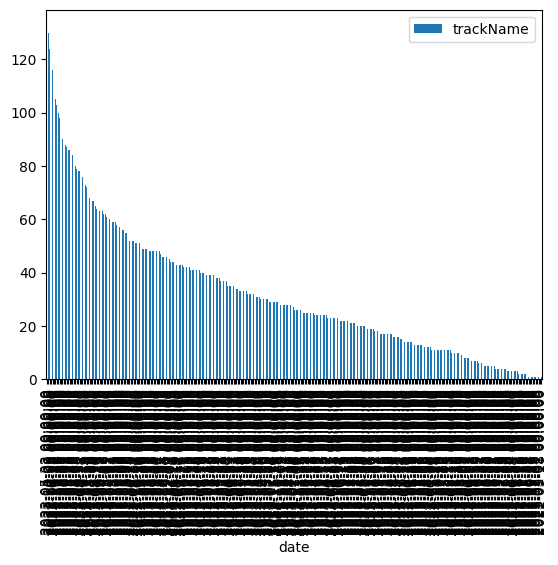

In [23]:
most_least.plot.bar()

<Axes: xlabel='date'>

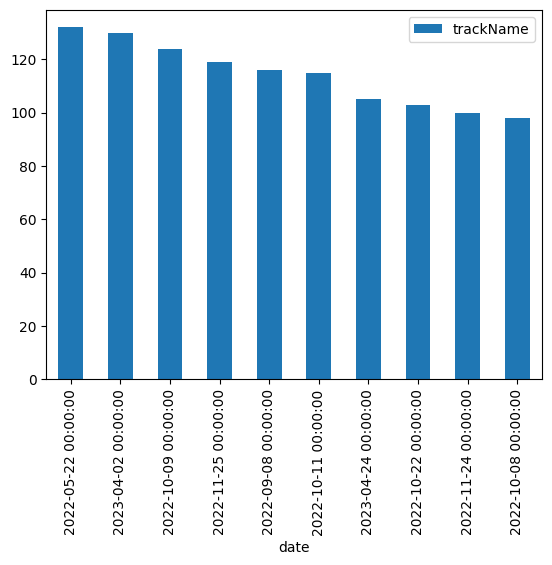

In [24]:
most_least[:10].plot.bar()

<Axes: xlabel='date'>

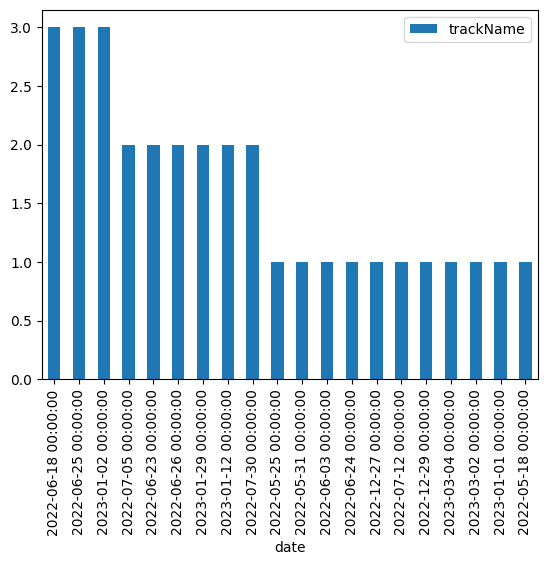

In [25]:
most_least[-20:].plot.bar()

In [26]:
most_least[most_least['trackName']==1]

,trackName,month,weekday,week
date,,,,
2022-05-25,1,May,Wednesday,21
2022-05-31,1,May,Tuesday,22
2022-06-03,1,June,Friday,22
2022-06-24,1,June,Friday,25
2022-12-27,1,December,Tuesday,52
2022-07-12,1,July,Tuesday,28
2022-12-29,1,December,Thursday,52
2023-03-04,1,March,Saturday,09
2023-03-02,1,March,Thursday,09


On what dates did I listen to more or less music by a particular artist?

In [27]:
stream_by_artist=df_final.groupby(["artistName","date"],as_index=False).agg({"trackName":"count"})
stream_by_artist.sort_values(by=["trackName"])

,artistName,date,trackName
0,(G)I-DLE,2022-07-26,1
3264,ONE OK ROCK,2022-08-15,1
3266,ONE OK ROCK,2022-08-18,1
3270,ONE OK ROCK,2022-08-24,1
3271,ONE OK ROCK,2022-08-28,1
...,...,...,...
4011,SZA,2023-01-05,38
4644,Taylor Swift,2022-11-25,43
1926,Harry Styles,2022-08-22,44
3835,SEVENTEEN,2022-05-29,50


In [28]:
stream_by_artist[stream_by_artist["trackName"]==stream_by_artist["trackName"].max()]

,artistName,date,trackName
3834,SEVENTEEN,2022-05-28,71


In [29]:
stream_by_artist[stream_by_artist["trackName"]==stream_by_artist["trackName"].min()]

,artistName,date,trackName
0,(G)I-DLE,2022-07-26,1
2,(G)I-DLE,2022-10-11,1
3,(G)I-DLE,2022-11-07,1
6,14 Casper,2022-08-21,1
8,2NE1,2022-10-14,1
...,...,...,...
5621,vaultboy,2023-01-28,1
5623,vaultboy,2023-04-21,1
5624,will.i.am,2023-03-31,1
5625,yaeow,2023-01-26,1


What is my Most Played Artist on my Spotify

In [30]:
artist_stream = df_final.groupby(['artistName'],as_index=False).agg({"trackName":"count"}).sort_values(by='trackName',ascending=False)
artist_stream


,artistName,trackName
873,Taylor Swift,1213
771,SZA,572
762,SEVENTEEN,530
358,Halsey,253
665,ONE OK ROCK,175
...,...,...
481,Kassy,1
482,Kate Bush,1
486,Kayou.,1
490,Kent Jones,1


<Axes: xlabel='artistName'>

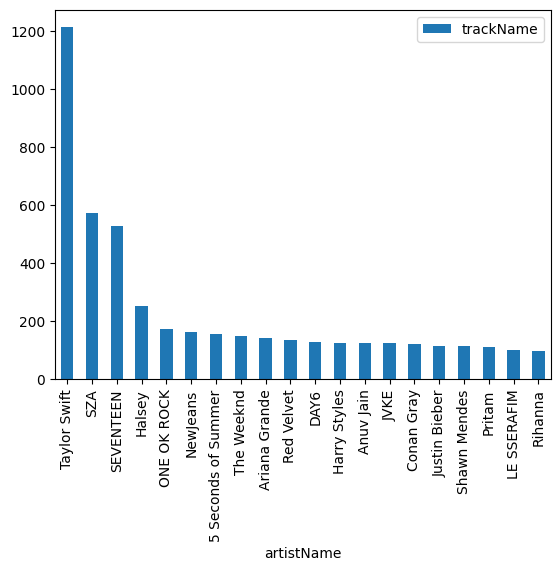

In [31]:
artist_stream.set_index('artistName')[:20].plot.bar()

In [32]:
artist_stream[artist_stream['trackName']==artist_stream['trackName'].min()]

,artistName,trackName
1036,t.A.T.u.,1
1035,sora.wav,1
728,Rajnish Saikia,1
972,YUGYEOM,1
975,Yayyoung,1
...,...,...
481,Kassy,1
482,Kate Bush,1
486,Kayou.,1
490,Kent Jones,1


During which time of the day i listen to music on Spotify

In [33]:
df_final['endTime']

0       2022-05-18 22:09:00
1       2022-05-19 10:25:00
2       2022-05-19 10:31:00
3       2022-05-19 10:31:00
4       2022-05-19 10:36:00
                ...        
11263   2023-05-18 22:42:00
11264   2023-05-18 22:46:00
11265   2023-05-18 23:25:00
11266   2023-05-18 23:28:00
11267   2023-05-18 23:29:00
Name: endTime, Length: 11268, dtype: datetime64[ns]

In [34]:
data={'date':df_final['endTime'].dt.date.to_list(),
'time':df_final['endTime'].dt.hour}
df=pd.DataFrame(data,)
df['date']

0        2022-05-18
1        2022-05-19
2        2022-05-19
3        2022-05-19
4        2022-05-19
            ...    
11263    2023-05-18
11264    2023-05-18
11265    2023-05-18
11266    2023-05-18
11267    2023-05-18
Name: date, Length: 11268, dtype: object

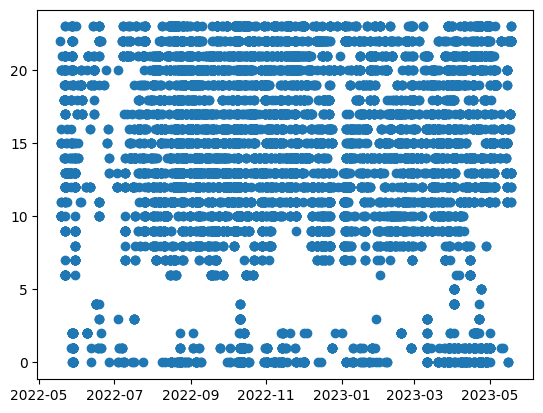

In [35]:
plt.scatter(df[['date']],df[['time']])
plt.show()

In [36]:
dfcopy=df_final.copy()
dfcopy['hour']=dfcopy['endTime'].dt.hour
dfcopy

,endTime,artistName,trackName,msPlayed,UniqueID,InLibrary,album,track_uri,artist_uri,genres,date,minPlayed,hour
0,2022-05-18 22:09:00,Indila,Love Story,180104,Indila:Love Story,1,Mini World,6nGeLlakfzlBcFdZXteDq7,0FEJqmeLRzsXj8hgcZaAyB,[french pop],2022-05-18,3.001733,22
1,2022-05-19 10:25:00,Indila,Love Story,316280,Indila:Love Story,1,Mini World,6nGeLlakfzlBcFdZXteDq7,0FEJqmeLRzsXj8hgcZaAyB,[french pop],2022-05-19,5.271333,10
2,2022-05-19 10:31:00,Taylor Swift,my tears ricochet,6225,Taylor Swift:my tears ricochet,1,folklore,1DnpjwTbSwV2V6O4PABMjW,06HL4z0CvFAxyc27GXpf02,[pop],2022-05-19,0.103750,10
3,2022-05-19 10:31:00,Paloma Faith,Only Love Can Hurt Like This,232893,Paloma Faith:Only Love Can Hurt Like This,1,A Perfect Contradiction,62ke5zFUJN6RvtXZgVH0F8,4fwuXg6XQHfdlOdmw36OHa,"[british soul, talent show]",2022-05-19,3.881550,10
4,2022-05-19 10:36:00,Conan Gray,Memories,248818,Conan Gray:Memories,1,Memories,7AYP21Q4qnxw2WxETEvSRb,4Uc8Dsxct0oMqx0P6i60ea,"[bedroom pop, pop, pov: indie]",2022-05-19,4.146967,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11263,2023-05-18 22:42:00,SEVENTEEN,PANG!,178640,SEVENTEEN:PANG!,1,SEVENTEEN 9th Mini Album 'Attacca',1ZpiUfzl9P0pMkA03xqmUy,7nqOGRxlXj7N2JYbgNEjYH,"[k-pop, k-pop boy group]",2023-05-18,2.977333,22
11264,2023-05-18 22:46:00,SEVENTEEN,HEY BUDDY,198240,SEVENTEEN:HEY BUDDY,1,; [Semicolon],1hd8IgMElWy3OqcFVjZMUx,7nqOGRxlXj7N2JYbgNEjYH,"[k-pop, k-pop boy group]",2023-05-18,3.304000,22
11265,2023-05-18 23:25:00,SEVENTEEN,Pinwheel,219029,SEVENTEEN:Pinwheel,1,"SEVENTEEN 2ND ALBUM 'TEEN, AGE' (2)",2NvrIHgujKttUQyx2uUMY9,7nqOGRxlXj7N2JYbgNEjYH,"[k-pop, k-pop boy group]",2023-05-18,3.650483,23
11266,2023-05-18 23:28:00,SEVENTEEN,MY I,184136,SEVENTEEN:MY I,0,NaN,NaN,NaN,NaN,2023-05-18,3.068933,23


In [37]:
count= dfcopy.groupby(['hour'],as_index=False).agg({"minPlayed":"sum"})
count


,hour,minPlayed
0,0,901.706717
1,1,755.775933
2,2,254.857517
3,3,94.338150
4,4,91.940767
5,5,52.533150
6,6,190.802350
7,7,350.304067
8,8,718.995317
9,9,1250.706883


<function matplotlib.pyplot.show(close=None, block=None)>

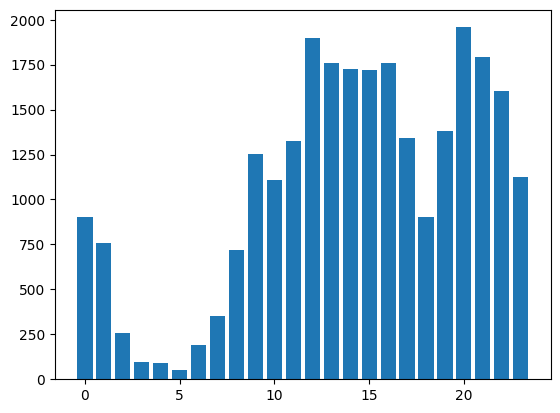

In [38]:
plt.bar(count['hour'],count['minPlayed'])
plt.show

Which genre do i listen to the most?


In [39]:
df_copy = df_final.copy()
df_copy. replace(np. nan,'',regex=True,inplace=True)

In [40]:
lst=[]
df_copy['genres'].to_string()
for i in range(len(df_copy)):
    #df_copy['genres'][i] = df_copy['genres'][i].join(", ")
    #print(df_copy['genres'][i])
    lst.extend(df_copy['genres'][i])

lst

['french pop',
 'french pop',
 'pop',
 'british soul',
 'talent show',
 'bedroom pop',
 'pop',
 'pov: indie',
 'pop',
 'viral pop',
 'r&b',
 'uk contemporary r&b',
 'australian pop',
 'pop',
 'viral pop',
 'k-pop',
 'k-pop boy group',
 'french pop',
 'pop',
 'korean pop',
 'pop',
 'french pop',
 'metropopolis',
 'pop',
 'pov: indie',
 'uk alternative pop',
 'british soul',
 'talent show',
 'gen z singer-songwriter',
 'alt z',
 'ambient pop',
 'dream pop',
 'el paso indie',
 'shoegaze',
 'k-pop',
 'k-pop girl group',
 'k-pop',
 'korean pop',
 'korean r&b',
 'k-pop',
 'korean pop',
 'k-pop',
 'korean r&b',
 'korean ost',
 'korean pop',
 'bedroom pop',
 'pop',
 'pov: indie',
 'k-pop',
 'k-pop boy group',
 'canadian pop',
 'pop',
 'viral pop',
 'j-pop',
 'j-rock',
 'japanese emo',
 'alt z',
 'gen z singer-songwriter',
 'k-pop',
 'k-pop boy group',
 'canadian pop',
 'pop',
 'viral pop',
 'k-pop',
 'k-pop boy group',
 'k-pop',
 'k-pop boy group',
 'k-pop',
 'k-pop boy group',
 'k-pop',
 'k-p

In [41]:
genre_count=pd.DataFrame([[x,lst.count(x)] for x in set(lst)])
genre_count.columns=['genre','count']

genre_count=genre_count.sort_values(by='count',ascending=False)


<Axes: xlabel='genre'>

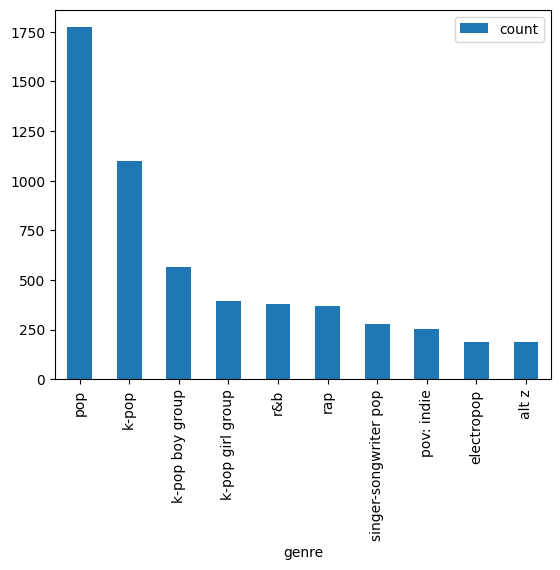

In [42]:
genre_count.set_index('genre')[:10].plot.bar()